In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## 1. Generating the Dataset
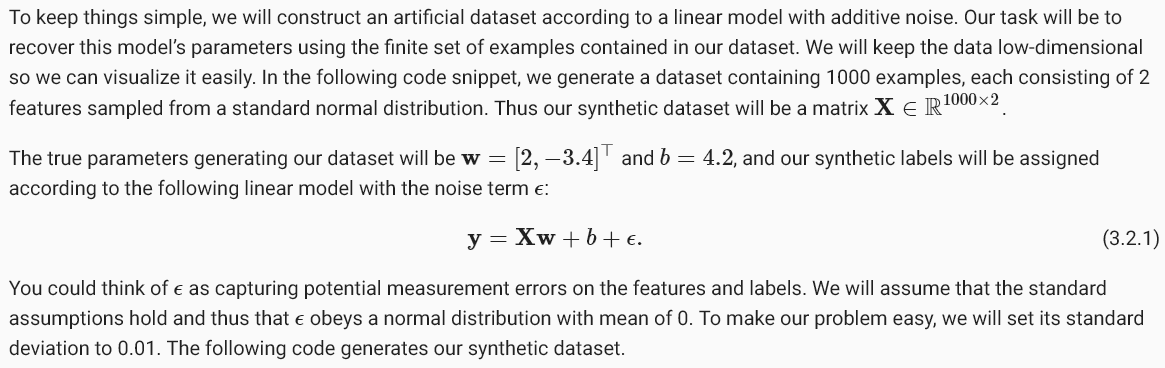

In [2]:
def synthetic_data(w, b, num_examples):
    ''' Generate y = Xw + b + noise '''
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
features[0]

tensor([-1.2546, -0.0307])

In [4]:
labels[0]

tensor([1.7884])

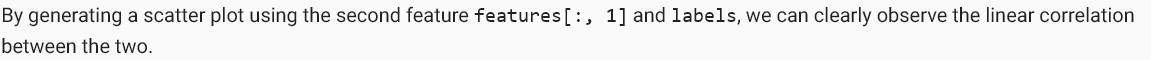

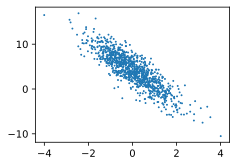

In [5]:
d2l.set_figsize()

d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1)

## 2. Reading the Dataset
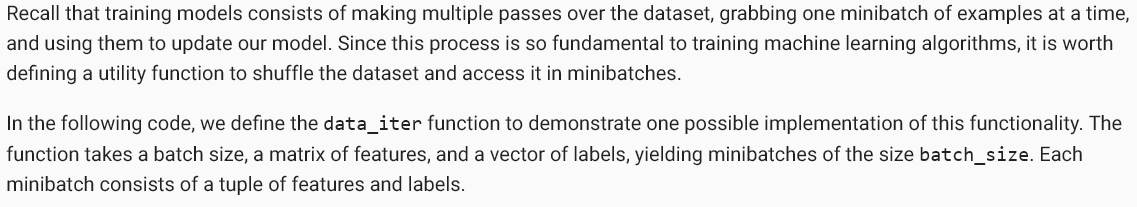

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

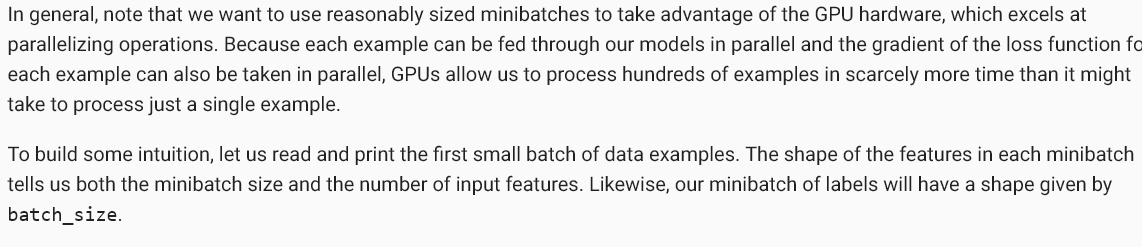

In [15]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 2.1157, -1.0883],
        [ 0.2552, -0.6045],
        [-0.7850,  0.3383],
        [-0.3627,  0.9008],
        [ 1.2644, -0.8812],
        [ 1.3789,  2.8457],
        [-0.9323, -1.6562],
        [-2.2858, -1.0164],
        [-0.7035,  1.4474],
        [-0.1096, -0.7157]]) 
 tensor([[12.1275],
        [ 6.7558],
        [ 1.4799],
        [ 0.4115],
        [ 9.7178],
        [-2.7132],
        [ 7.9748],
        [ 3.0781],
        [-2.1523],
        [ 6.3972]])


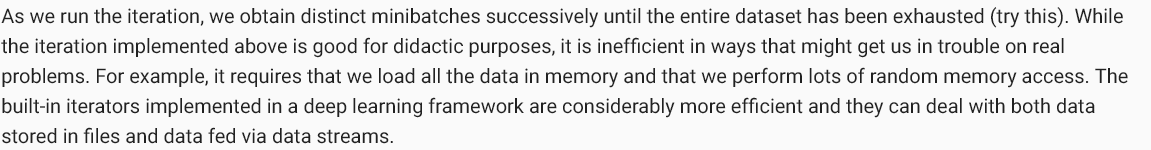
## 3. Initializing Model Parameters
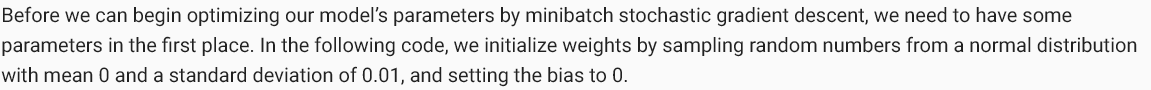


In [16]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

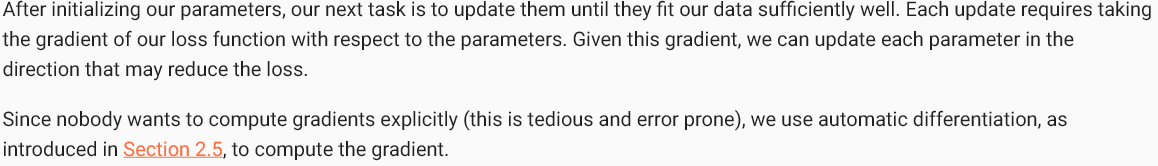

## 4. Defining the Model
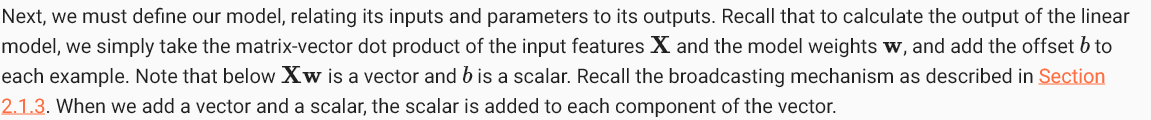

In [17]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

## 5. Defining the Loss Function

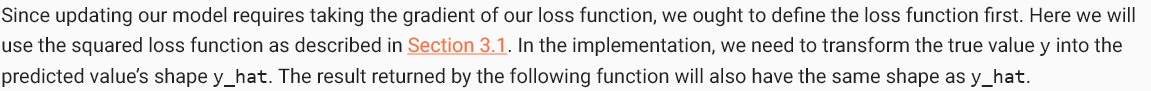

In [18]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 6. Defining the Optimization Algorithm
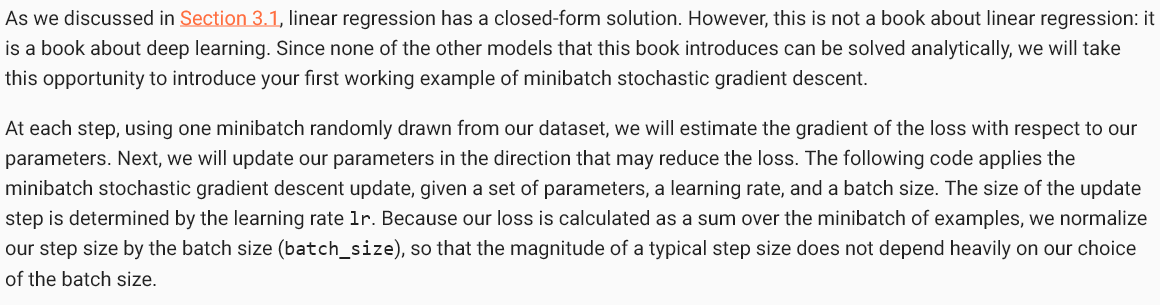

In [19]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 7. Training
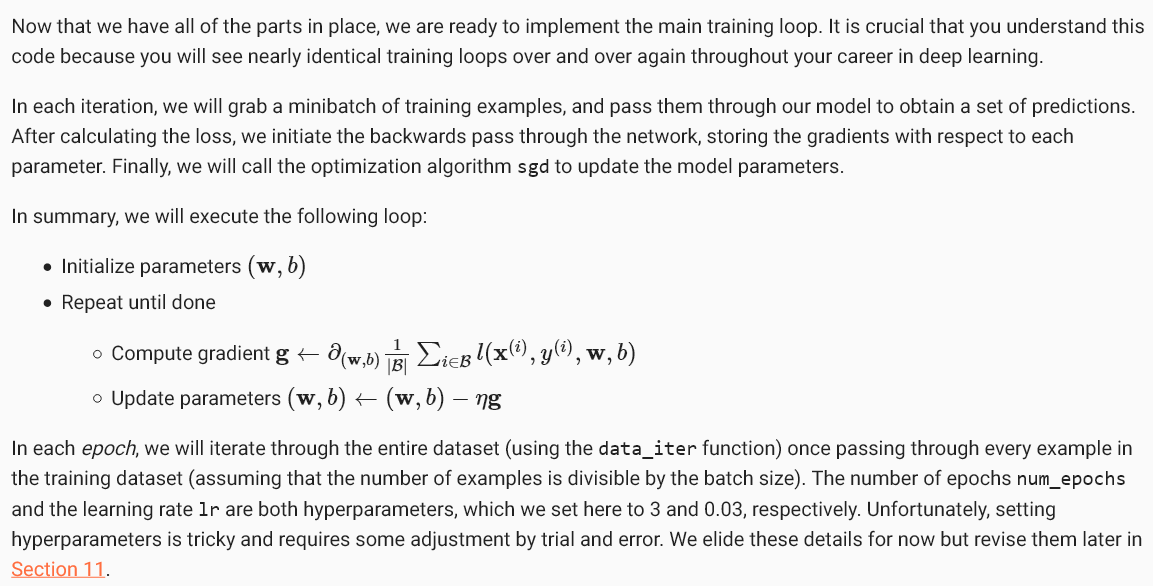

In [21]:
lr = 0.03
epochs = 10
net = linreg
loss = squared_loss

for epoch in range(epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # Minibatch loss in  X and y
        
        # Compute gradient on l w.r.t [w, b]
        l.sum().backward()
        sgd([w, b], lr, batch_size) # Update parameters using their Gradient
        
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000048
epoch 4, loss 0.000047
epoch 5, loss 0.000047
epoch 6, loss 0.000047
epoch 7, loss 0.000047
epoch 8, loss 0.000047
epoch 9, loss 0.000047
epoch 10, loss 0.000047


In [22]:
# Error in estimating 
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([0.0003, 0.0001], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0004], grad_fn=<RsubBackward1>)
